In [87]:
!pip install missingno

In [88]:
# Bibliotecas
import pandas as pd
import numpy as np
import git
import os
import missingno as msno

# Funções

In [89]:
def get_git_root(path):
    git_repo = git.Repo(path, search_parent_directories=True)
    git_root = git_repo.git.rev_parse("--show-toplevel")
    return git_root


In [90]:
# diretório base do repositório
git_root = get_git_root(os.getcwd())
git_root

'/workspaces/data-science-job-salaries'

In [91]:
# Leitura dos dados
data_path = os.path.join(git_root, "data/ds_salaries.csv")
df = pd.read_csv(data_path)
df.head()


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [92]:
# Remover coluna Unnamed: 0
df.drop(columns="Unnamed: 0", inplace=True)
df.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [93]:
# Dimensões da tabela
print("Quantidade de instâncias: {}".format(df.shape[0]))
print("Quantidade de atributos: {}".format(df.shape[1]))


Quantidade de instâncias: 607
Quantidade de atributos: 11


In [94]:
# Atributos
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [95]:
# Quais são os tipos de variáveis dos atributos?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [96]:
# Atributos categóricos [object]
categorical_df = df.loc[
    :,
    [
        "experience_level",
        "employment_type",
        "job_title",
        "salary_currency",
        "employee_residence",
        "company_location",
        "company_size",
    ],
]

# Atributos numéricos [int64]
numerical_df = df.loc[
    :, ["work_year", "salary", "salary_currency", "salary_in_usd", "remote_ratio"]
]

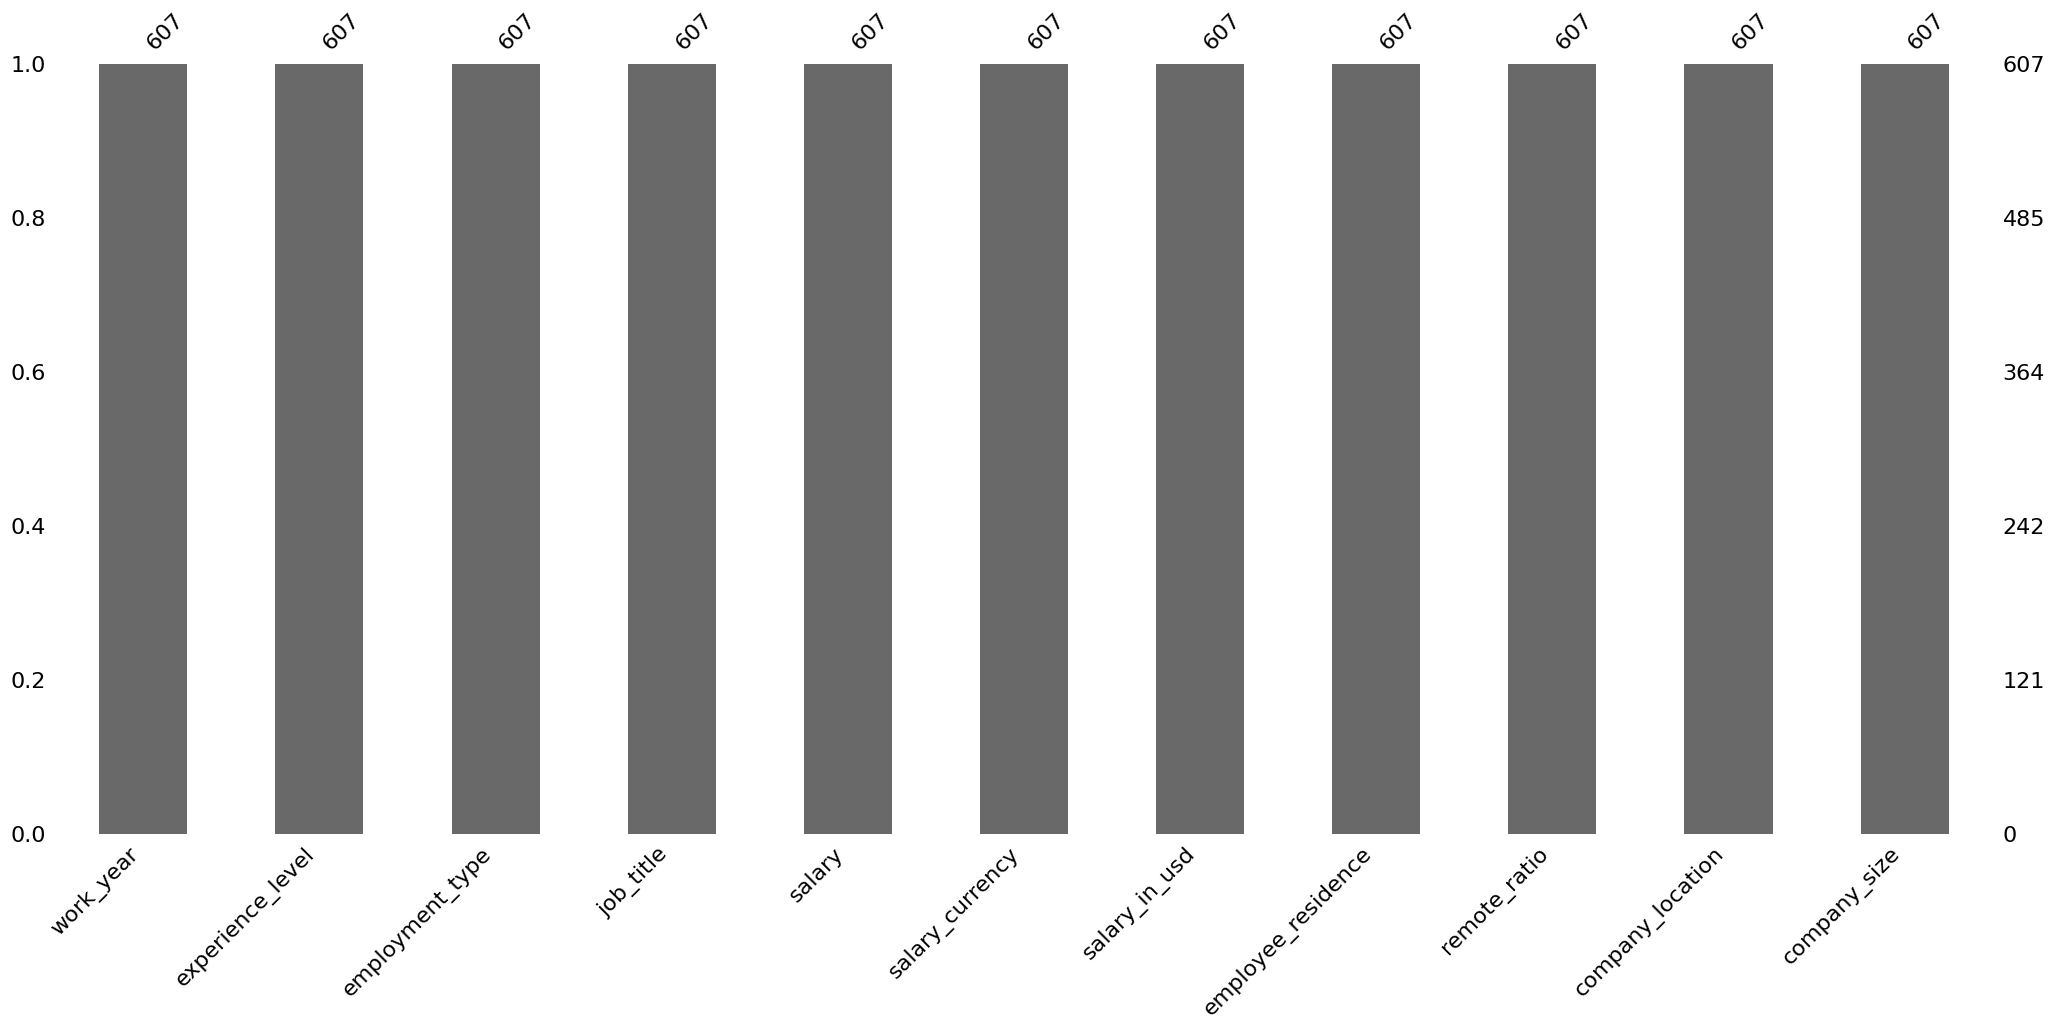

In [98]:
# Dataframe contém valores faltantes?
msno.bar(df)

Nenhum dado faltante visualizado a partir do gráfico

# Atributos Numéricos

In [101]:
numerical_df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


## work_year

In [105]:
# Qual o período amostral do banco de dados?
df["work_year"].value_counts().sort_index()

2020     72
2021    217
2022    318
Name: work_year, dtype: int64

Esse banco de dados detém uma amostra dos salários na carreira de cientista de dados nos anos de 2021 até 2022

In [106]:
# Gráfico do período amostral

## Salário
Dois atributos são diretamente ligados ao salário. O atributo salary demonstra o valor em moeda corrente, enquanto salary_in_usd, conforme o nome sugere, o valor já convertido para dólares

In [108]:
# Análise da correlação entre os dois atributos
# TODO: Plotar um gráfico

Como esperado a correlação entre os dois atributos é positiva e muito forte.